In [ ]:
import pandas as pd

bbdds = ['brca', 'coad', 'hnsc', 'kirc', 'laml', 'lgg', 'lihc', 'luad', 'lusc', 'sarc', 'skcm', 'stad', 'ucec']

mean_accuracies_rnacorex = []
max_accuracies_rnacorex = []
mean_accuracies_rf = []
max_accuracies_rf = []
mean_accuracies_svm = []
max_accuracies_svm = []
mean_accuracies_gb = []
max_accuracies_gb = []
mean_accuracies_gnn = []
max_accuracies_gnn = []
mean_accuracies_gker = []
max_accuracies_gker = []

for bd in bbdds:
    data = pd.read_excel('../results/table_results_'+bd+'.xlsx', sheet_name='rnacorex')
    mean_acc = data['mean'][0]
    mean_accuracies_rnacorex.append(mean_acc)
    max_acc = data['max'][0]
    max_accuracies_rnacorex.append(max_acc)

for bd in bbdds:
    data = pd.read_excel('../results/table_results_'+bd+'.xlsx', sheet_name='rf')
    mean_acc = data['mean'][0]
    mean_accuracies_rf.append(mean_acc)
    max_acc = data['max'][0]
    max_accuracies_rf.append(max_acc)

for bd in bbdds:
    data = pd.read_excel('../results/table_results_'+bd+'.xlsx', sheet_name='svm')
    mean_acc = data['mean'][0]
    mean_accuracies_svm.append(mean_acc)
    max_acc = data['max'][0]
    max_accuracies_svm.append(max_acc)

for bd in bbdds:
    data = pd.read_excel('../results/table_results_'+bd+'.xlsx', sheet_name='gb')
    mean_acc = data['mean'][0]
    mean_accuracies_gb.append(mean_acc)
    max_acc = data['max'][0]
    max_accuracies_gb.append(max_acc)

for bd in bbdds:
    data = pd.read_excel('../results/table_results_'+bd+'.xlsx', sheet_name='gnn')
    mean_acc = data['mean'][0]
    mean_accuracies_gnn.append(mean_acc)
    max_acc = data['max'][0]
    max_accuracies_gnn.append(max_acc)

for bd in bbdds:
    data = pd.read_excel('../results/table_results_'+bd+'.xlsx', sheet_name='gker')
    mean_acc = data['mean'][0]
    mean_accuracies_gker.append(mean_acc)
    max_acc = data['max'][0]
    max_accuracies_gker.append(max_acc)

In [ ]:
import matplotlib.pyplot as plt

all_mean = [mean_accuracies_rnacorex, mean_accuracies_rf, mean_accuracies_svm, mean_accuracies_gb, mean_accuracies_gnn, mean_accuracies_gker]
all_max = [max_accuracies_rnacorex, max_accuracies_rf, max_accuracies_svm, max_accuracies_gb, max_accuracies_gnn, max_accuracies_gker]

all_data = all_mean + all_max  

plt.figure(figsize=(10, 6))

# Posiciones separadas: primeros 6 en 1–6, segundos 6 en 8–13
positions = list(range(1, 7)) + list(range(8, 14))

bp = plt.boxplot(
    all_data,
    positions=positions,
    widths=0.6,
    patch_artist=True,
    showmeans=True,
    medianprops=dict(color="black", linewidth=1.5),
    meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black', markersize=5)
)

# Colores por pares
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'] * 2
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.9)

# Etiquetas en el eje X
labels = ['RNACOREX', 'RF', 'SVM', 'GB', 'GNN', 'GKER'] * 2
plt.xticks(positions, labels, rotation=45, fontsize=12)

# Línea divisoria en el hueco
plt.axvline(x=7, color='gray', linestyle='--', alpha=0.4)

# Línea horizontal en y=0.5
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1.2)

# Texto encima de cada grupo (títulos locales)
plt.text(3.5, plt.ylim()[1] * 1.02, "a) Mean", ha='center', va='bottom', fontsize=18, fontweight='bold')
plt.text(10.5, plt.ylim()[1] * 1.02, "b) Max", ha='center', va='bottom', fontsize=18, fontweight='bold')

# Etiquetas y título general
plt.ylabel("Accuracies")

plt.tight_layout()
# plt.show()
plt.savefig(f"../figures/dist_accuracies.eps", format="eps", dpi=300, bbox_inches='tight')
plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


C:\Users\aoviedomadr\AppData\Local\Temp\ipykernel_14132\2175808969.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(all_tissues))


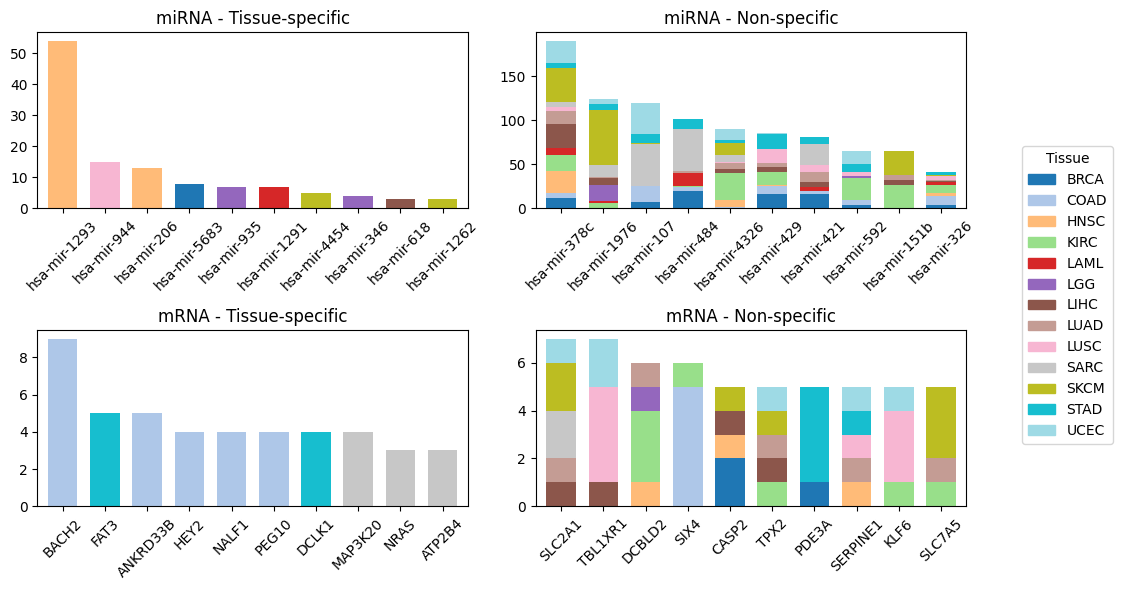

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


files = {
    "BRCA": "../results/connections_lognorm_brca.csv",
    "COAD": "../results/connections_lognorm_coad.csv",
    "HNSC": "../results/connections_lognorm_hnsc.csv",
    "KIRC": "../results/connections_lognorm_kirc.csv",
    "LAML": "../results/connections_lognorm_laml.csv",
    "LGG": "../results/connections_lognorm_lgg.csv",
    "LIHC": "../results/connections_lognorm_lihc.csv",
    "LUAD": "../results/connections_lognorm_luad.csv",
    "LUSC": "../results/connections_lognorm_lusc.csv",
    "SARC": "../results/connections_lognorm_sarc.csv",
    "SKCM": "../results/connections_lognorm_skcm.csv",
    "STAD": "../results/connections_lognorm_stad.csv",
    "UCEC": "../results/connections_lognorm_ucec.csv"
}

# Leer y unir
dfs = []
for tissue, f in files.items():
    df = pd.read_csv(f)
    df = df.assign(tissue=tissue)
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True)

# Separar miRNAs y mRNAs
mirnas = all_df[["miRNA", "tissue"]].rename(columns={"miRNA": "element"})
mirnas["type"] = "miRNA"

mrnas = all_df[["mRNA", "tissue"]].rename(columns={"mRNA": "element"})
mrnas["type"] = "mRNA"

# Clasificar específico vs multitejido
def classify_elements(df):
    n_tissues = df.groupby("element")["tissue"].nunique().reset_index(name="n_tissues")
    df = df.merge(n_tissues, on="element")
    df["multi"] = df["n_tissues"].apply(lambda x: "específico" if x == 1 else "multitejido")
    return df

mirnas = classify_elements(mirnas)
mrnas = classify_elements(mrnas)

# Definir colores fijos para todos los tejidos
all_tissues = list(files.keys())
cmap = cm.get_cmap("tab20", len(all_tissues))
tissue_colors = {t: cmap(i) for i, t in enumerate(all_tissues)}

# Función para graficar en un eje
def plot_top_elements(elements_df, filter_type, ax, topN=10, title=""):
    subset = elements_df[elements_df["multi"] == filter_type]
    if subset.empty:
        ax.set_title(f"No hay {title} ({filter_type})")
        return

    counts = subset.groupby(["element", "tissue"]).size().reset_index(name="count")
    pivot = counts.pivot(index="element", columns="tissue", values="count").fillna(0)

    # Seleccionar top N
    top_elements = pivot.sum(axis=1).sort_values(ascending=False).head(topN).index
    pivot_top = pivot.loc[top_elements]

    # Colores fijos según tejido
    colors = [tissue_colors[t] for t in pivot_top.columns]

    pivot_top.plot(kind="bar", stacked=True, ax=ax, color=colors, legend=False, width = 0.7)
    ax.set_title(f"{title}")
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45, labelsize=10)

# Crear figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

plot_top_elements(mirnas, "específico", ax=axes[0,0], topN=10, title="miRNA - Tissue-specific")
plot_top_elements(mirnas, "multitejido", ax=axes[0,1], topN=10, title="miRNA - Non-specific")
plot_top_elements(mrnas, "específico", ax=axes[1,0], topN=10, title="mRNA - Tissue-specific")
plot_top_elements(mrnas, "multitejido", ax=axes[1,1], topN=10, title="mRNA - Non-specific")

# Leyenda con todos los tejidos
handles = [plt.Rectangle((0,0),1,1, color=tissue_colors[t]) for t in all_tissues]
fig.legend(handles, all_tissues, title="Tissue", bbox_to_anchor=(1.02, 0.5), loc="center left")

plt.tight_layout()
plt.show()
# plt.savefig(f"../figures/repeated_rnas.eps", format="eps", dpi=300, bbox_inches='tight')
# plt.close()

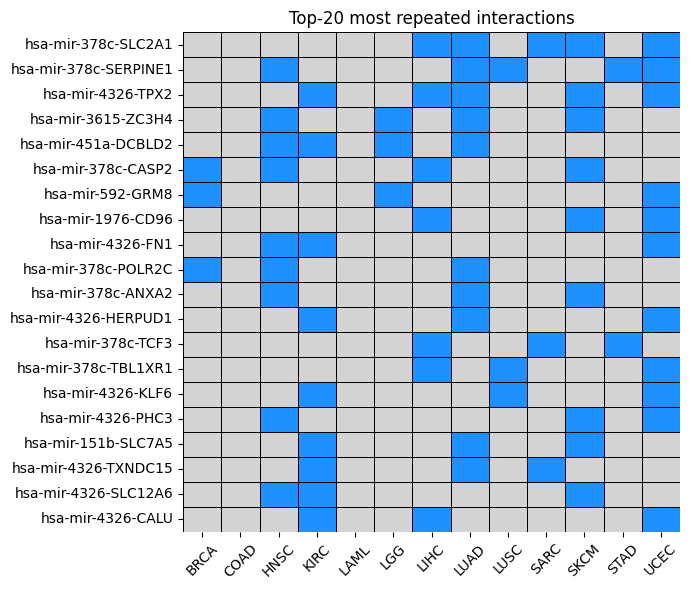

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Crear identificador único de interacción ---
all_df["interaction"] = all_df["miRNA"] + "-" + all_df["mRNA"]

# --- 2. Contar cuántos tejidos tiene cada interacción ---
interaction_counts = all_df.groupby("interaction")["tissue"].nunique().reset_index(name="n_tissues")

# --- 3. Seleccionar las top 20 interacciones más repetidas (por número de apariciones totales) ---
top_interactions = all_df.groupby("interaction").size().sort_values(ascending=False).head(20).index

# --- 4. Crear matriz binaria interacciones x tejidos ---
heatmap_df = pd.DataFrame(0, index=top_interactions, columns=files.keys())

for interaction in top_interactions:
    tissues_present = all_df[all_df["interaction"] == interaction]["tissue"].unique()
    heatmap_df.loc[interaction, tissues_present] = 1

# --- 5. Ordenar interacciones por número total de repeticiones ---
heatmap_df["total"] = heatmap_df.sum(axis=1)
heatmap_df = heatmap_df.sort_values("total", ascending=False).drop(columns="total")

# --- 6. Plot heatmap ---
plt.figure(figsize=(7,6))
ax = sns.heatmap(heatmap_df, cmap=["lightgrey", "dodgerblue"], cbar=False, linewidths=0.5, linecolor='black')
plt.title("Top-20 most repeated interactions")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.ylabel('')
plt.tight_layout()
# plt.savefig(f"../figures/pancancer_interactions.eps", format="eps", dpi=300, bbox_inches='tight')
# plt.close()
plt.show()